# How long would it take to fall through the Earth?

**A computational essay by Karl Henrik Fredly, undergraduate at the University of Oslo (karlhf@student.uv.uio.no)**

## Introduction

What would happen if the ground under you disappeared and you fell all the way to the center of the Earth? What if someone somehow made a tunnel from the surface to the core? How fast would you go along the way? What would your top speed be? Would you be able to get up to the surface again or would you get trapped by gravity?

In this computational essay, we are going to look your movement as you fall under the influence of the Earth's gravity without being stopped by the ground. We will look at how position, velocity and acceleration changes during the fall, and use these findings to better understand the movement.

<img src="FallingThroughTheEarthResources/KolaBorehole.jpg" alt="Drawing" style="width: 60%;"/>

*The Kola Borehole (From <a href="http://www.absolute-knowledge.com/unexpected-discoveries-kola-superdeep-borehole/">absolute-knowledge.com</a>)*

## Gravity in and around spherical objects

For the purpose of this essay we are going to assume that the Earth is a perfect sphere with a varying density given by the [Preliminary Reference Earth Model (PREM)](https://en.wikipedia.org/wiki/Preliminary_reference_Earth_model).


We will also assume that there is no air resistance. With air resistance, our falling person would quickly reach terminal velocity and slowly lose all of their speed near the center of the Earth. This situation would also be interesting to look at, but will not be the focus of this essay. Furhermore, we will assume that the Earth's rotation has no effect, for example by saying that you fall from pole to pole.

### The Shell Theorem

The main difference between being affected by gravity while outside the Earth, and being affected while inside it, is how much of it is below you to "pull you down". As you venture further down, less of the Earth will be below you to pull you down, and more of it will be above you to pull you up. In addition to this, as you get closer to different parts of the Earth, they will have a greater pull on you due to being closer to you.

The aforementioned factors lead to some questions and calculations beyond the scope of this essay, which will not be addressed here. We will instead use a result called the [Shell Theorem](http://hyperphysics.phy-astr.gsu.edu/hbase/Mechanics/sphshell2.html) which makes this problem much simpler. The Shell Theorem has the following implications for our problem:

- A spherically symmetric body affects external objects gravitationally as though all of its mass were concentrated at a point at its centre
- When at a distance r from the center, all mass at a greater distance than r can be ignored

This means that we do not have to calculate the gravitational pull from all throughout the Earth, since we can act as if all of the Earth's mass is located in its center. We also only need to worry about the what is further in than the point you are currently at.

<img src="FallingThroughTheEarthResources/ShellTheoremWe.jpg" alt="Drawing" style="width: 70%;"/>

The gravitational force between two objects is given by $F = \frac{GMm}{r^2}$

where G is the gravitational constant $6.68\times10^-11\frac{Nm^2}{kg^2}$, M is the mass of one of the objects, m is the mass of the other object and r is the distance between the objects. The force acts on both of the objects, and is pointed from one object to the other.

We will let M be the mass that is pulling them down. M will vary however, so we will need to use the PREM to find the total mass of the Earth at different distances from the center.

### The variable density of the Earth

For plotting and calculations we import numpy, pyplot and polynomial.

In [1]:
import numpy as np #Used for mathematical functions and constants
import matplotlib.pyplot as plt #Used for plotting
import numpy.polynomial.polynomial as poly #Used later for finding a polynomial that approximates the data

The Preliminary Reference Earth Model gives us the density of the Earth at different distances from the center. 

The data can be found here: http://ds.iris.edu/ds/products/emc-prem/ at "Model Download". I use the file "PREM_ANISOTROPIC".

Let us read the data and store them in arrays.

In [2]:
radius = []
density = []

#The file has 199 lines starting with "[Radius] [Density]" that we read like this
infile = open("FallingThroughTheEarthResources/PREM_ANISOTROPIC.txt","r")
lines = infile.readlines()
for line in lines[3:]: #The data starts at line 3.
    numbers = line.split()
    radius.append(float(numbers[0]))
    density.append(float(numbers[1]))
infile.close()
radius = np.array(radius) #We change radius and density to numpy arrays in order to easily manipulate them by 1000 for plotting
density = np.array(density)

By using pylot we can plot the data:

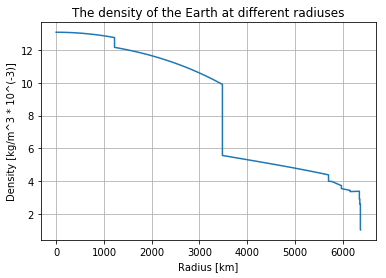

In [3]:
plt.plot(radius/1000,density/1000) #Dividing by 1000 to get more plot-friendly units
plt.xlabel("Radius [km]")
plt.ylabel("Density [kg/m^3 * 10^(-3)]")
plt.title("The density of the Earth at different radiuses")
plt.grid()
plt.show()

*This image (taken from <a href="https://en.wikipedia.org/wiki/Structure_of_the_Earth">en.wikipedia.org/wiki/Structure_of_the_Earth</a>) shows how the different layers and densities of the earth fit together.*

<img src="FallingThroughTheEarthResources/RadialDensityPREM.jpg" alt="Drawing" style="width: 70%;"/>

### Mass at different heights

Next we need to find out how the total mass further in than us changes as we fall. By working our way from the center we can add one and one "shell" to find the total mass at different distances from the center. We have to find the total mass by adding these shells due to the relatively rough resolution of our density data.

![title](FallingThroughTheEarthResources/EarthShells.jpg)

Note that we use the same density for the inner and outer sphere to calculate the mass of the shell. The density we use for the spheres is the average of the Earth's density at the outer and inner radius of the shell. So that:

$$ M_{shell} = M_{outer} - M_{inner} = \frac{4}{3}\pi r_{outer}^3 Density - \frac{4}{3}\pi r_{inner}^3 Density $$

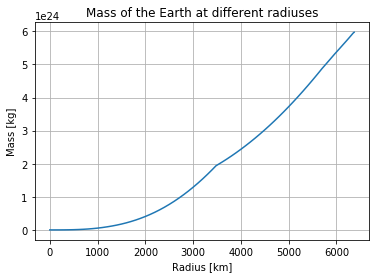

In [4]:
pi = np.pi
masses = []
shellMass = 4/3*np.pi*radius[0]**3*density[0] #The innermost shell. In our case this has a mass of 0.
masses.append(shellMass)

for i in range(1,len(radius)):
    shellDensity = (density[i-1]+density[i])/2 #The average of the density at the outer and inner radius
    #We find the mass of the shells corresponding to every data point
    shellMass = 4/3*pi*radius[i]**3*shellDensity - 4/3*pi*radius[i-1]**3*shellDensity
    #We add the next total mass to the list, adding the mass of the current shell with the previous total mass
    masses.append(shellMass + masses[i-1])
    
plt.plot(radius/1000,masses)
plt.xlabel("Radius [km]")
plt.ylabel("Mass [kg]")
plt.title("Mass of the Earth at different radiuses")
plt.grid()
plt.show()

We see that the total mass increases very slowly near the center, and faster near the surface. While the density is higher near the center, the volume is much smaller. Meaning that the total mass does not change much when the radius increases at first, as the volume of the inner shells are so small.

We can compare the total mass at the outermost radius, with the actual mass of the Earth, which is $5.972*10^{24}kg$, to get an idea of the accuracy of our calculations.

In [5]:
print("The total mass we find using this model is {:.3E} kg".format(masses[-1]))

The total mass we find using this model is 5.973E+24 kg


This accuracy is encouraging. Note that the total mass is not the only useful result here, as we will use the mass at different radiuses as well.

## Acceleration at different heights

The gravitational force between two objects is given by $F = \frac{GMm}{r^2}$. The Shell Theorem states that at a distance r we only need to consider the mass further in than where we currently are. Additionally, Newton's second law gives us that:

$$
\begin{align*}
F = ma \Rightarrow a = \frac{F}{m} = \frac{GMm}{r^2m} = \frac{GM}{r^2}
\end{align*}
$$

In [6]:
G = 6.674 * 10**(-11) #The gravitational constant
acceleration = []
acceleration.append(0) #We need to handle the first acceleration here to not have to divide by zero in the loop

for i in range(1,len(radius)):
    acceleration.append(G*masses[i]/(radius[i]**2))
acceleration = np.array(acceleration)

We can plot these findings as well. We are eventually going to need a general function for gravity since this dataset does not give us the acceleration at the distances between the data points. To better show this we can plot the data as points next to our smooth graph.

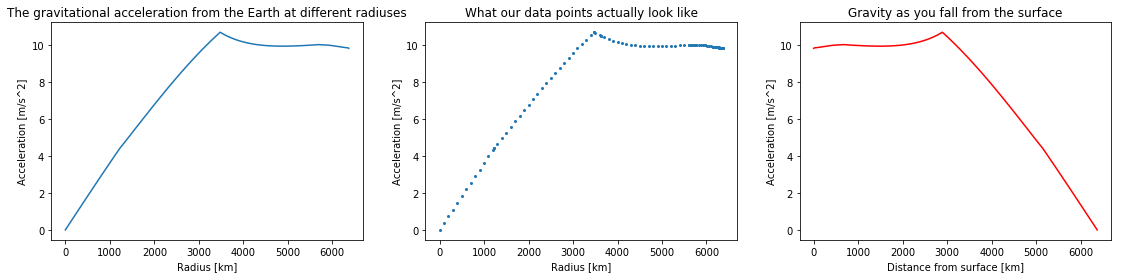

In [7]:
plt.figure(figsize=(19, 4))
plt.subplot(131)
plt.plot(radius/1000,acceleration) #The smooth graph
plt.xlabel("Radius [km]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("The gravitational acceleration from the Earth at different radiuses")

plt.subplot(132)
plt.plot(radius/1000, acceleration, linestyle="", marker="o", markersize=2) #The data plotted as points
plt.xlabel("Radius [km]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("What our data points actually look like")

plt.subplot(133)
#We also plot how gravity changes moving from the surface and down by turning the plot around.
plt.plot(abs(radius-radius[-1])/1000,acceleration, color="red")
plt.xlabel("Distance from surface [km]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("Gravity as you fall from the surface")

plt.show()

On the red graph we see that when you start falling, the acceleration will first stay nearly constant before increasing slightly. This is because, as we get closer to the more dense inner parts of the Earth, the gravitational pull from them will increase. Since the outer layers are so much less dense than the mantle or core, we do not "lose" much gravitational pull compared to the pull we gain from being closer to the denser parts. When we are at around 3500 km gravity starts weakening. This happens because the amount of mass pulling us down is starting to reduce fast.

### Creating a function to describe the acceleration

So far we have worked out the acceleration at all the points that our dataset contained, but if we are to calculate what a fall through the Earth would look like we will need a general formula, or a function that finds the acceleration at any height.

We can achieve this by using the method <a href="https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.polynomial.polynomial.polyfit.html">polyfit.</a> Polyfit uses linear algebra to find the polynomial that best fits the data points given. I have found that a polynomial of degree 3 works well here, and that using a separate polynomial before and after the maximum spike of the acceleration offers greater accuracy.

In [8]:
turn = np.argmax(acceleration) #The spike in the acceleration graph
deg = 3
coefs1 = poly.polyfit(radius[:turn], acceleration[:turn], deg) #Polynomial for the points further in than the "spike"
coefs2 = poly.polyfit(radius[turn:], acceleration[turn:], deg) #Polynomial for the points further out than the "spike"

earthRadius = radius[-1]
earthMass = masses[-1]
def grav(r):
    dist = abs(r) #The absolute value of the distance
    direc = -np.sign(r) #The direction of gravity. It is opposite of our position, since gravity pulls us towards the center

    if dist > earthRadius: #If we are outside the Earth
        return(direc*G*earthMass/r**2) #Normal formula for acceleration using the mass of the entire Earth

    elif dist < radius[turn]: #If we are further in than the "spike"
        sum = 0
        for i in range(deg+1): #a0 + a1*r + a2*r**2 + a3*r**3
            sum += coefs1[i]*dist**(i)
        return(direc*sum)
    
    else: #Function 2 for distances further out than the "spike"
        sum = 0
        for i in range(deg+1):
            sum += coefs2[i]*dist**(i)
        return(direc*sum)

We will not look too much into how we generate these functions that approximate the graph for gravity we found earlier. However, it is important to understand that what we did was find polynomials that have graphs that are similar to the one we just plotted. If we write out the coefficients of the first polynomial, the one that approximates gravity between the surface and the "spike" in gravity, they look like this:

In [9]:
print(coefs1)

[-2.93375495e-02  3.87773093e-06 -2.39818116e-13  3.84955504e-21]


$$
\begin{align*}
f_1(r) &= a_0 + a_1r^1 + a_2r^2 + a_3r^3 \\
f_1(r) &= -2.93*10^{-2} + 3.88*10^{-6}r - 2.40*10^{-13}r^2 + 3.85*10^{-21}r^3
\end{align*}
$$

To show this new general function in relation to the values for gravitational acceleration we found from the data, we can plot them together and summarize the errors for every point:

Total error = 1.0836096370862585


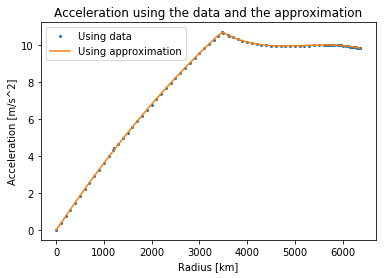

In [10]:
accelApprox = [abs(grav(r)) for r in radius] #Note that we are only interested in the size of the acceleration here
error = 0
for i in range(len(radius)):
    error += abs(accelApprox[i] - acceleration[i])
print("Total error = {}".format(error))

plt.plot(radius/1000,acceleration, label="Using data", linestyle="", marker="o", markersize=2)
plt.plot(radius/1000,accelApprox, label="Using approximation")
plt.xlabel("Radius [km]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("Acceleration using the data and the approximation")
plt.legend()
plt.show()

We can see that there is very little difference. This function for gravitational acceleration works for the distances in between the points in our dataset, *and* the ones outside. When we are further out than the radius of the Earth (outside the ground), the function gives us the acceleration using the formula $\frac{GM}{r^2}$ with the total mass of the Earth as M. This means that we can find the acceleration outside the Earth and all over the insides of the Earth.

So far we have looked at positive distances and positve accelerations for the sake of seing how their sizes relate. From now on we will include the direction of gravity in our calculations. When we are above the center, gravity will point down, and when we are below the center, gravity will point up. The sign of gravity will be the opposite of the sign of our height.

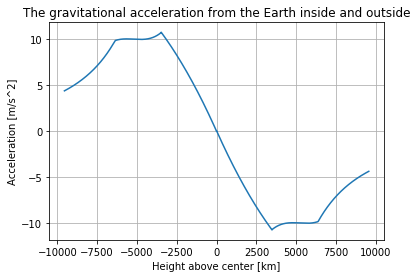

In [11]:
rads = np.linspace(-radius[-1]*1.5,radius[-1]*1.5,10000)
accs = np.array([grav(i) for i in rads])

plt.plot(rads/1000,accs)
plt.xlabel("Height above center [km]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("The gravitational acceleration from the Earth inside and outside")
plt.grid()
plt.show()

With our function for gravitational acceleration, we are ready to start calculating the movement.

## Calculating movement under the effect of a variable gravity

We will first need to define some parameters. I found that 10000 steps of 1 second gives good accuracy and speed for the purpose of this essay.

In [12]:
n = 10000 #number of steps in our calculation
dt = 1 #number of seconds each step takes

Our position will be starting at the surface of the Earth (at a heigh equal to the Earth's radius), and will then decrease as we get closer to the center, reaching negative values when we are below the center.

Our velocity will start at 0m/s and will then decrease as we accelerate downward.

These arrays will be filled with the results of our calculations as we use the Euler-Cromer method, and will be used for plotting.

In [13]:
positions = np.zeros(n)
positions[0] = earthRadius #You can change this initial height to see how the fall would look like from outer space for example

#This is redundant, as the array is all zeroes. However, you can change this value to see how that changes our results
startingVelocity = 0
velocities = np.zeros(n)
velocities[0] = startingVelocity

accelerations = np.zeros(n)

times = np.linspace(0,n*dt,n)

We have our initial conditions and function for acceleration in order, so all that's left is using the Euler-Cromer method to find the positions, velocities and accelerations of the movement over time:

In [14]:
for i in range(n-1):
    accelerations[i] = grav(positions[i])
    velocities[i+1] = velocities[i] + accelerations[i]*dt
    positions[i+1] = positions[i] + velocities[i+1]*dt
accelerations[n-1] = grav(positions[n-1]) #The acceleration at the end is not calculated during the loop

We use the Euler-Cromer method due to the fact that there is no simple way to get a function for the position. We have no way of finding the exact position and velocity that we will have in the future, so instead we find the acceleration right now and use that to find the velocity we would have after a small time step if the acceleration was constant (which it pretty much is over a small time step). Using this velocity we find the position we would have after a small time step if velocity was constant (which it pretty much is over a small time step). With enough of these time steps we can approximate a movement with a variable acceleration and velocity over a longer period of time.

We can plot our results side by side in subplots:

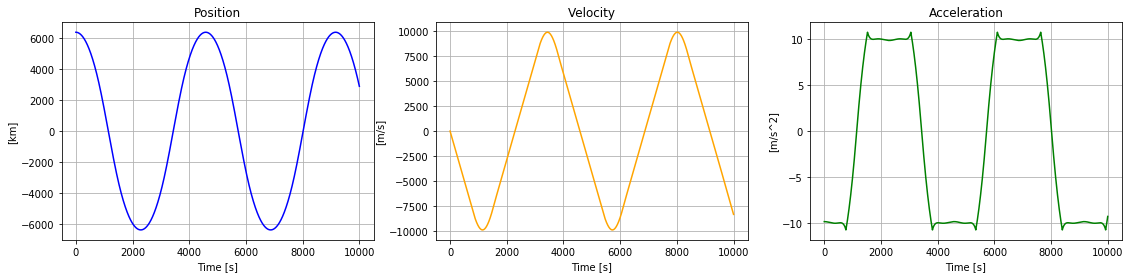

In [15]:
plt.figure(figsize=(19, 4))
plt.subplot(131)
plt.plot(times,positions/1000,color="blue")
plt.xlabel("Time [s]")
plt.ylabel("[km]")
plt.title("Position")
plt.grid()

plt.subplot(132)
plt.plot(times,velocities,color="orange")
plt.xlabel("Time [s]")
plt.ylabel("[m/s]")
plt.title("Velocity")
plt.grid()

plt.subplot(133)
plt.plot(times,accelerations,color="green")
plt.xlabel("Time [s]")
plt.ylabel("[m/s^2]")
plt.title("Acceleration")
plt.grid()

plt.show()

We see that we would fall all the way through and then back again, and then back again and so on. Given that gravity is a conservative force, it makes sense that we would never stop moving, but rather fall back and forth around the center.

## The Payoff: Analyzing our results

Now we have all that we need to find out how long it takes to fall through the Earth. To find out the time it takes, we need to find out how long it takes to reach the first dip of the position graph, as that is the "bottom" of the Earth.

In [16]:
#In order to not find out the time of the second dip, we only look at the positions up to a time of 3000, to be safe
minIndex = np.argmin(positions[:3000]) #Index of the lowest value of positions, when we are at the opposite end of the Earth
minutes = times[minIndex]/60
exSeconds = times[minIndex]%60
print("The time it takes to travel through the Earth is {:.0f} minutes and {:.0f} seconds.".format(minutes,exSeconds))
#time uses seconds, so we divide by 60 to get minutes, and use %60 to get the remainder of the division

The time it takes to travel through the Earth is 38 minutes and 10 seconds.


We find that it takes slightly over 38 minutes to fall through the Earth. That would be 38 minutes of feeling weightless in free fall before coming to a slow stop at the other end of the Earth, hanging upside down in the air. For comparison, it would take a Boeing 787 almost an entire day to fly halfway around the world.

In [17]:
topSpeed = np.amax(velocities) #The highest value in velocities
print("The highest speed reached during the fall is {:.0f} m/s.".format(topSpeed))

The highest speed reached during the fall is 9920 m/s.


On your way down you reach a top speed of 9,920 m/s. That is equal to 35,712 kilometers per hour, or 22,190 miles per hour. That is only slightly slower than the fastest manned object, the Apollo 10, which reached a top speed of 11,107 m/s when returning from the Moon. It is also a fair bit faster than the typical speed of the ISS and other satellites orbiting the Earth, which travel at around 7,700 m/s (which is about the speed we would reach if the Earth had a constant density).

To better look at how position, velocity and acceleration change in relation to each other throughout the fall, we can normalize the arrays by dividing each array by its greatest value and then show them in the same plot.

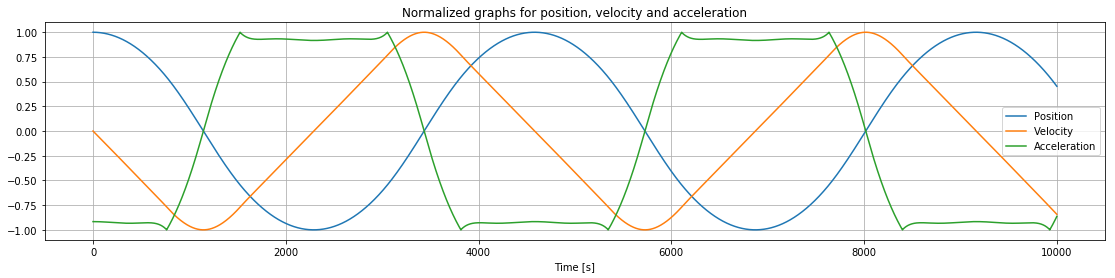

In [18]:
plt.figure(figsize=(19, 4))
plt.plot(times,positions/(np.amax(positions)),label="Position")
plt.plot(times,velocities/(np.amax(velocities)),label="Velocity")
plt.plot(times,accelerations/(np.amax(accelerations)),label="Acceleration")

plt.xlabel("Time [s]")
plt.title("Normalized graphs for position, velocity and acceleration")
plt.legend()
plt.grid()
plt.show()

We see that when we reach the center (position=0), acceleration is also 0. This is also when we reach our top velocity.

We saw earlier that gravity is almost constant close to the surface, which can also be seen here. This near constant gravity near the surface is what makes our velocity change so linearly between the sharper turns.

### Summary and Conclustion

Using our model of a perfectly spherical Earth with a density given by the Preliminary Reference Earth Model, with no air resistance and no rotation we found that we would fall through the entire Earth in 38 minutes and 10 seconds, reaching a top speed of 9,920 m/s along the way.

We saw that we would fall back and forth, reaching the same height each time. Our model also showed that acceleration would initially increase a little before decreasing nearly linearly while falling towards the center.

These are, of course, estimates. A more accurate picture of a fall through the Earth could include a more accurate density model, air resistance, the coriolis effect or an earth that is not perfectly spherical. Even though you will probably not be falling through the Earth at any time soon, these calculations can be useful in other places. If one wanted to fly a spacecraft into a gaseous planet, one would have to look at how it would fall under the variable gravity while moving through the gases. One might even want to dig through other celestial objects, like moons or asteroids, where these kinds of calculations could be useful.

### Sources and Inspiration

Preliminary Reference Earth Model - http://ds.iris.edu/ds/products/emc-prem/

The speeds of different things - https://en.wikipedia.org/wiki/Orders_of_magnitude_(speed)

How Long To Fall Through The Earth? - minutephysics - https://www.youtube.com/watch?v=urQCmMiHKQk

Gravity of Earth - https://en.wikipedia.org/wiki/Gravity_of_Earth

Structure of the Earth https://en.wikipedia.org/wiki/Structure_of_the_Earth